In [6]:
import pandas as pd
bikes = pd.read_csv("bike_train.csv")
print(bikes.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bikes = pd.read_csv("bike_train.csv")
print("First 5 rows:")
print(bikes.head())
print("\nShape:", bikes.shape)  # ~10k rows, 12 cols
print("\nMissing values:")
print(bikes.isnull().sum())  # Should be 0—clean dataset!

First 5 rows:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Shape: (10886, 12)

Missing values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
register

In [12]:
# Convert datetime and extract features
bikes["datetime"] = pd.to_datetime(bikes["datetime"])
bikes["hour"] = bikes["datetime"].dt.hour
bikes["day"] = bikes["datetime"].dt.day
bikes["month"] = bikes["datetime"].dt.month

# Drop datetime and registered/casual (we predict total count)
bikes = bikes.drop(columns=["datetime", "casual", "registered"])
print(bikes.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  hour  day  month  
0     16     0    1      1  
1     40     1    1      1  
2     32     2    1      1  
3     13     3    1      1  
4      1     4    1      1  


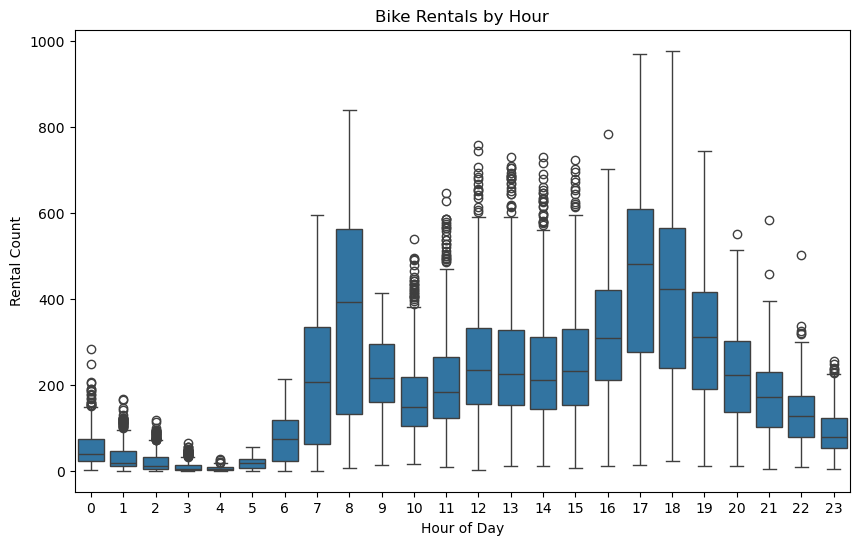

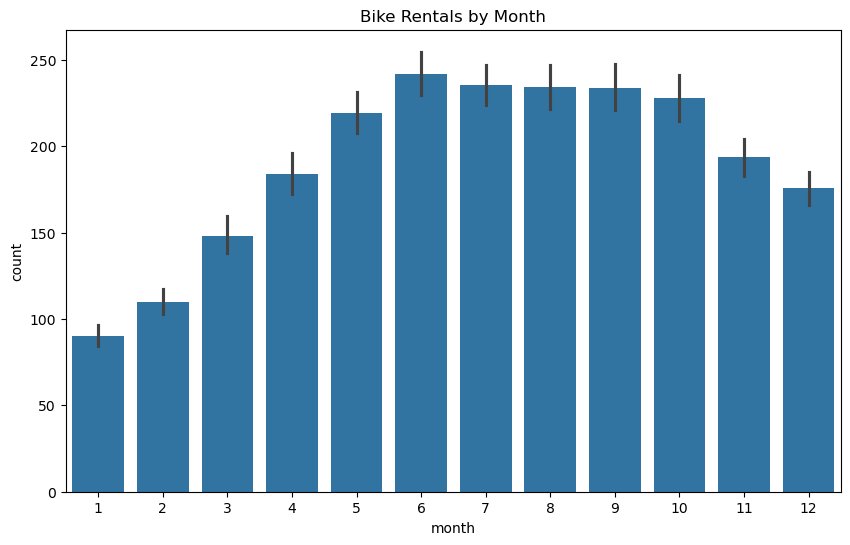

In [14]:
# Hourly counts
plt.figure(figsize=(10, 6))
sns.boxplot(x="hour", y="count", data=bikes)
plt.title("Bike Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Rental Count")
plt.show()

# Monthly trend
plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="count", data=bikes)
plt.title("Bike Rentals by Month")
plt.show()

Correlation with count:
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
hour          0.400601
day           0.019826
month         0.166862
Name: count, dtype: float64


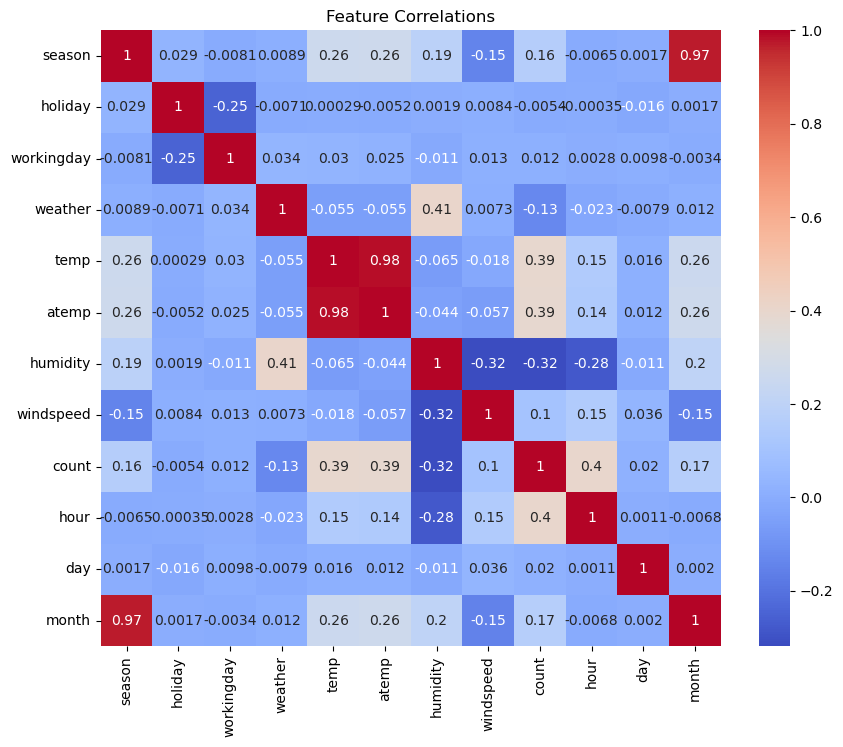

In [16]:
corr_matrix = bikes.corr()
print("Correlation with count:")
print(corr_matrix["count"])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Features and target
X = bikes.drop(columns=["count"])
y = bikes["count"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("Feature importances:", dict(zip(X.columns, rf.feature_importances_)))

RMSE: 66.9636554566134
Feature importances: {'season': 0.017596921437404968, 'holiday': 0.0023596069054482457, 'workingday': 0.07383170315538763, 'weather': 0.020281377446484585, 'temp': 0.0736869193018916, 'atemp': 0.07170062101402765, 'humidity': 0.053449347327540024, 'windspeed': 0.026798373324659383, 'hour': 0.5941131035617194, 'day': 0.03139853625186338, 'month': 0.034783490273573116}


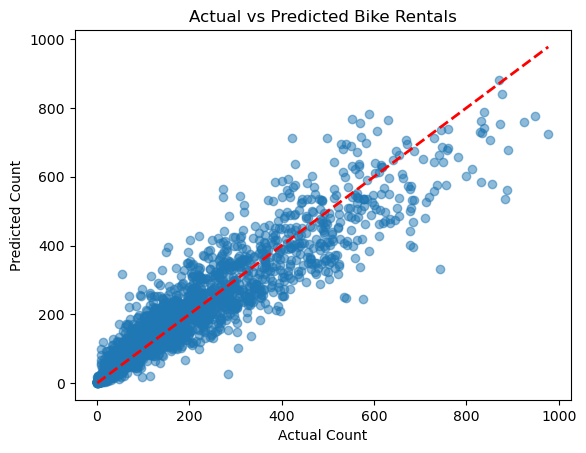

In [22]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

In [24]:
print(f"Mean bike rentals: {bikes['count'].mean():.1f}")
print(f"Model RMSE: {rmse:.1f}")
print("Key insight: Hour and temp drive rentals—Random Forest captures non-linear trends.")

Mean bike rentals: 191.6
Model RMSE: 67.0
Key insight: Hour and temp drive rentals—Random Forest captures non-linear trends.
